In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randint(0, 20, 100)
noise = np.random.randn(100)*2
Y = 3*X + 1 + noise

In [3]:
X.shape

(100,)

In [4]:
X

array([ 1, 13,  8,  9,  1,  8,  2, 13,  8, 16, 18, 10, 15, 13, 14, 17, 10,
        1, 19, 17, 17, 10,  9, 10, 14, 13, 13, 13, 17,  7, 14,  1,  8,  4,
        2,  8, 15, 19,  3,  5,  1, 14,  7,  7, 11,  0, 13,  3, 11, 10, 13,
       13, 16,  7, 15,  9,  9,  3,  3, 17, 11, 17, 17,  7,  0,  9,  8,  0,
       15,  4, 12,  9,  0, 10, 16,  8, 15,  3,  0,  2, 16, 10, 17,  9, 12,
        5, 13, 19, 16, 11, 15,  2,  8,  2, 13, 19,  8,  8, 16, 19])

In [5]:
Y.shape

(100,)

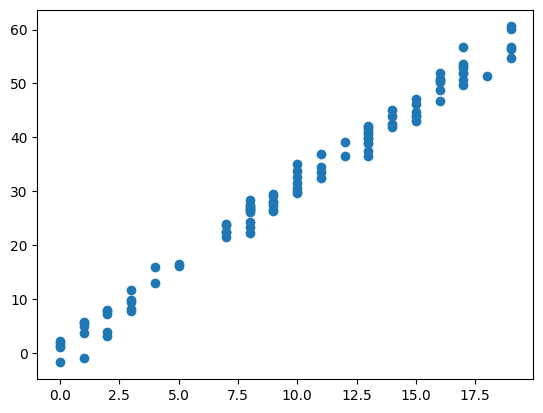

In [6]:
plt.scatter(X, Y)
plt.show()

In [7]:
X.shape

(100,)

In [8]:
X = X.reshape(100, 1)

In [9]:
X.shape

(100, 1)

In [10]:
def hypothesis(x, weights):
    '''
    x : real input value (time spent)
    weights : list of w0 and w
    '''
    y_hat = weights[0] + weights[1]*x
    return y_hat

In [11]:
# 2.5
hypothesis(2.5, [0, 3])

7.5

In [12]:
def error(X, Y, weights):
    '''
    X : input n data points
    Y : target n data points
    weights : list of w0 and w1
    '''
    n = X.shape[0]
    total_err = 0.0
    for i in range(n):
        y_hat_i = hypothesis(X[i], weights)
        total_err += (Y[i] - y_hat_i)**2

    return total_err/n

In [13]:
np.zeros(15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
def gradient(X, Y, weights):
    n = X.shape[0]
    grad = np.zeros(2) # np.array([0,0])

    for i in range(n):
        y_hat_i = hypothesis(X[i], weights)

        grad[0] += (y_hat_i - Y[i])

        grad[1] += ((y_hat_i - Y[i])*X[i])

    return 2*grad/n

In [15]:
def gradient_descent(X, Y, max_itr = 50, learning_rate = 0.001):
    # step 1 : init() randomly

    weights = np.random.randn(2)

    error_list = []

    # step 2 repeate until convergence
    for i in range(max_itr):

        e = error(X, Y, weights)
        error_list.append(e)

        grad = gradient(X, Y, weights)

        weights[0] = weights[0] - learning_rate*grad[0]
        weights[1] = weights[1] - learning_rate*grad[1]


    return weights, error_list

In [16]:
opt_weights, error_list = gradient_descent(X, Y)

C:\Users\HP\AppData\Local\Temp\ipykernel_5560\2435903567.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_hat_i - Y[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_5560\2435903567.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += ((y_hat_i - Y[i])*X[i])


In [17]:
opt_weights.round()

array([2., 3.])

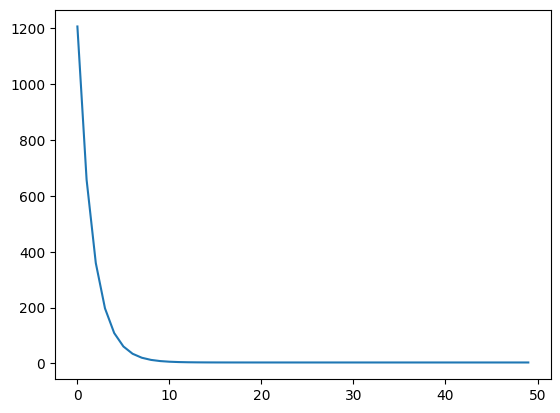

In [18]:
plt.plot(error_list)

In [19]:
# prediction
hypothesis(X[0], opt_weights)

array([4.49201162])

In [20]:
Y[0]

5.6389973896366525

In [21]:
x = 0
opt_weights[1]*x + opt_weights[0]  # y  = w*x + w0  (y = m x + c)

1.5201488670962238

In [22]:
x = 19
opt_weights[1]*x + opt_weights[0]  # y  = w*x + w0  (y = m x + c)

57.985541261835024

In [23]:
x1, y1 = 0, 0.69
x2, y2 = 19, 58.21

[]

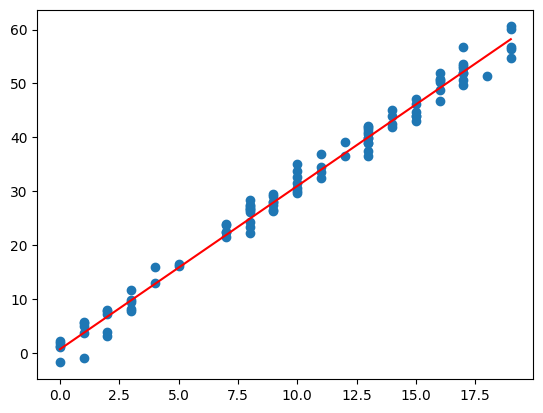

In [24]:
plt.scatter(X, Y)
plt.plot([x1,x2], [y1, y2], color='red')
plt.plot()